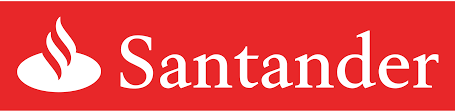

In [16]:
from IPython.display import Image
Image(filename='Santander logo.png', width=1200, height=100)

Let's start... 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, ensemble
from xgboost import XGBClassifier
import timeit
%matplotlib inline

In [18]:
# columns to be used as features #
feature_cols = ["ind_empleado","pais_residencia","sexo","age", "ind_nuevo", "antiguedad", "nomprov", "segmento"]
dtype_list = {'ind_cco_fin_ult1': 'float16', 'ind_deme_fin_ult1': 'float16', 'ind_aval_fin_ult1': 'float16', 'ind_valo_fin_ult1': 'float16', 'ind_reca_fin_ult1': 'float16', 'ind_ctju_fin_ult1': 'float16', 'ind_cder_fin_ult1': 'float16', 'ind_plan_fin_ult1': 'float16', 'ind_fond_fin_ult1': 'float16', 'ind_hip_fin_ult1': 'float16', 'ind_pres_fin_ult1': 'float16', 'ind_nomina_ult1': 'float16', 'ind_cno_fin_ult1': 'float16', 'ncodpers': 'int64', 'ind_ctpp_fin_ult1': 'float16', 'ind_ahor_fin_ult1': 'float16', 'ind_dela_fin_ult1': 'float16', 'ind_ecue_fin_ult1': 'float16', 'ind_nom_pens_ult1': 'float16', 'ind_recibo_ult1': 'float16', 'ind_deco_fin_ult1': 'float16', 'ind_tjcr_fin_ult1': 'float16', 'ind_ctop_fin_ult1': 'float16', 'ind_viv_fin_ult1': 'float16', 'ind_ctma_fin_ult1': 'float16'}
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1'] 

In [19]:
print ("Feature columns:{0}; Target_Columns:{1}" .format(len(feature_cols), len(target_cols)))

Feature columns:8; Target_Columns:24


In [24]:
#limit_rows = 100000
train = pd.read_csv("./train_ver2.csv",dtype=dtype_list, na_values=['NA', 'NaN'])

C:\Users\Anshul.Dhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's rename all the column names with english name to understand what's going on...

In [25]:
train.columns = ['Month_status_date', 'Customer_ID', 'Employee_Index', 'Customer_country', 'Sex', 'Age', 'Join_date',
                'New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Last_date_Prim_Cust', 'Cust_type_beg_Mth', 'Cust_Reln_type_beg_mth',
                'Residence_flag', 'Forigner_flag', 'Emp_spouse_flag', 'Channel_when_joined', 'Deceased_flag', 
                'Address_type', 'Customer_address', 'Address_detail', 'Activity_flag', 'Gross_household_income',
                'Segment', 'Saving_account', 'Guarantees', 'Cur_account', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']

Median Household income by Address_detail

In [26]:
dict={}
dict.update(train.groupby("Address_detail")["Gross_household_income"].median().astype(int))
dict['ALAVA']

96967

In [27]:
(train.dtypes.index[0], train.dtypes[0])

('Month_status_date', dtype('O'))

In [28]:
desc = train.describe()
desc.loc['Unique'] = [len(train[col].unique()) for col in desc.columns]
desc.loc["Missing"] = [train[col].isnull().sum() for col in desc.columns]
desc.T

,count,mean,std,min,25%,50%,75%,max,Unique,Missing
Customer_ID,13647309.0,834904.211501,431565.025784,15889.00,452813.00,931893.0,1199286.00,1553689.00,956645.0,0.0
New_customer,13619575.0,0.059562,0.236673,0.00,0.00,0.0,0.00,1.00,3.0,27734.0
Relnshp_flag,13619575.0,1.178399,4.177469,1.00,1.00,1.0,1.00,99.00,3.0,27734.0
Address_type,13619574.0,1.000000,0.000000,1.00,1.00,1.0,1.00,1.00,2.0,27735.0
Customer_address,13553718.0,26.571470,12.784017,1.00,15.00,28.0,35.00,52.00,53.0,93591.0
Activity_flag,13619575.0,0.457811,0.498217,0.00,0.00,0.0,1.00,1.00,3.0,27734.0
Gross_household_income,10852934.0,134254.318238,230620.238822,1202.73,68710.98,101850.0,155955.96,28894395.51,520995.0,2794375.0
Saving_account,13647309.0,0.000102,0.010117,0.00,0.00,0.0,0.00,1.00,2.0,0.0
Guarantees,13647309.0,0.000023,0.004810,0.00,0.00,0.0,0.00,1.00,2.0,0.0
Cur_account,13647309.0,NaN,0.000000,0.00,0.00,1.0,1.00,1.00,2.0,0.0


In [30]:
test = pd.read_csv("./test_ver2.csv",dtype=dtype_list, na_values=['NA', 'NaN'])

test.columns = ['Month_status_date', 'Customer_ID', 'Employee_Index', 'Customer_country', 'Sex', 'Age', 'Join_date',
                'New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Last_date_Prim_Cust', 'Cust_type_beg_Mth', 'Cust_Reln_type_beg_mth',
                'Residence_flag', 'Forigner_flag', 'Emp_spouse_flag', 'Channel_when_joined', 'Deceased_flag', 
                'Address_type', 'Customer_address', 'Address_detail', 'Activity_flag', 'Gross_household_income',
                'Segment']

desc = test.describe()
desc.loc['Unique'] = [len(test[col].unique()) for col in desc.columns]
desc.loc["Missing"] = [test[col].isnull().sum() for col in desc.columns]
desc.loc['Datatype'] = [test[col].dtype for col in desc.columns]
desc.T

C:\Users\Anshul.Dhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,count,mean,std,min,25%,50%,75%,max,Unique,Missing,Datatype
Customer_ID,929615,879457,448157,15889,483362,966425,1.26432e+06,1.55369e+06,929615,0,int64
Age,929615,40.2498,17.1851,2,25,39,51,164,118,0,int64
New_customer,929615,0.0278492,0.164541,0,0,0,0,1,2,0,int64
Relnshp_Mnths,929615,77.7284,1797.82,-999999,23,55,136,257,259,0,int64
Relnshp_flag,929615,1.17742,4.16604,1,1,1,1,99,2,0,int64
Cust_type_beg_Mth,929592,1.00006,0.0107785,1,1,1,1,3,3,23,float64
Address_type,929615,1,0,1,1,1,1,1,1,0,int64
Customer_address,925619,26.5462,12.8366,1,15,28,35,52,53,3996,float64
Activity_flag,929615,0.425272,0.494384,0,0,0,1,1,2,0,int64


Note that we have far less numeric features in test data. This is because we do not have any of the 24 products information in test data, as the objective of the project is to predict the products a customer is going to buy

In [31]:
eng_num_features = ['Employee_Index','Age','New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Residence_flag', 'Forigner_flag', 'Emp_spouse_flag','Deceased_flag', 'Activity_flag', 'Gross_household_income']
eng_target_features = ['Saving_account', 'Guarantees', 'Cur_account', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']

In [32]:
span_eng_feat_dict = {'fecha_dato': 'Month_status_date', 'ncodpers': 'Customer_ID', 'ind_empleado': 'Employee_Index',
                     'pais_residencia':'Customer_country', 'sexo': 'Sex', 'age': 'Age', 'fecha_alta': 'Join_date',
                     'ind_nuevo': 'New_customer', 'antiguedad':'Relnshp_Mnths', 'indrel': 'Relnshp_flag',
                     'ult_fec_cli_1t': 'Last_date_Prim_Cust', 'indrel_1mes': 'Cust_type_beg_Mth', 'tiprel_1mes':'Cust_Reln_type_beg_mth',
                     'indresi': 'Residence_flag', 'indext': 'Forigner_flag', 'conyuemp': 'Emp_spouse_flag', 'canal_entrada':'Channel_when_joined',
                     'indfall': 'Deceased_flag','tipodom':'Address_type', 'cod_prov':'Customer_address','nomprov': 'Address_detail', 
                     'ind_actividad_cliente': 'Activity_flag', 'renta': 'Gross_household_income', 'segmento' :'Segment' }

In [33]:
print ("Unique customers in train:", len(train['Customer_ID'].unique()))
print ("Unique customers in test:", len(test['Customer_ID'].unique()))
print ("Common customers in train and test:", len(set(train['Customer_ID'].unique()).intersection(set(test['Customer_ID'].unique()))))

Unique customers in train: 956645
Unique customers in test: 929615
Common customers in train and test: 929615


Happy to see that every customer in test is also there in train data

### Let's first explore all Numeric Variables

In [34]:
## Let's explore age variable

In [35]:
print(list(train.Age.unique()))

[' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53', ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42', ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60', ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84', ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52', ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16', ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96', ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64', ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75', '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91', ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101', '106', '103', '  3', '  2', '102', '104', '111', '107', '109', '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60, 54, 51, 33, 62, 50, 11, 57, 55, 85, 80, 70, 32, 52, 94, 61, 13, 29, 49, 76, 28, 63, 10, 88, 68, 64, 58, 56

In [36]:
train["Age"] = train["Age"].replace(to_replace = ' NA', value = np.nan)

In [37]:
train["Age"].isnull().sum()

27734

In [38]:
train["Age"] = train["Age"].astype("float")

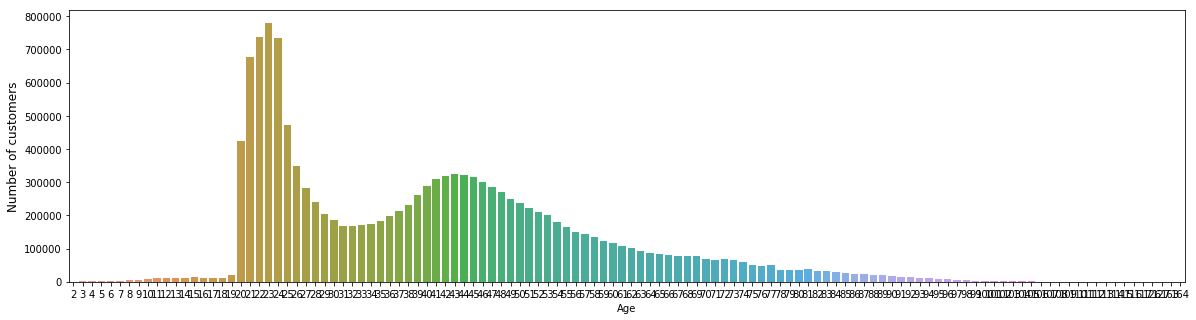

In [39]:
age_series = train.Age.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(age_series.index.astype('int'), age_series.values)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.show()

Let's see if the customer's who are between 20 and 27 have different products than customers who are over 28 years

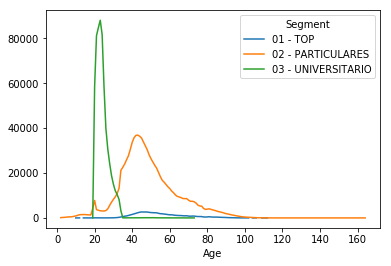

In [40]:
#Age vs Segment
train.groupby(["Age","Segment"])["Customer_ID"].nunique("Customer_ID").unstack().plot()

Looks like only particulars segment has age group <16. This segment might be served some specific products...

Lets look at segments for young generations only

In [41]:
young = train[(train["Age"] > 18) & (train["Age"] < 30)]

In [42]:
young.groupby(["Segment", "Age"])["Customer_ID"].nunique("Customer_ID").unstack()

Age,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
Segment,,,,,,,,,,,
01 - TOP,2,46,38,23,25,22,14,19,20,28,49
02 - PARTICULARES,4246,7795,3694,3432,3165,3112,3075,3268,4026,5592,7002
03 - UNIVERSITARIO,36,58387,81182,84715,88028,81732,58476,39891,30749,24294,18868


Looks like these are university students, as most of the young customers belong to university segment... It makes sense why we have a bimodal distribution

It looks like we have bimodal distribution here. 3 things to notice here -
1. We have some population under 18 having bank accounts.. these may be students or junior account holders where there parents have created an account for them.
2. We seem to have a group of people between 18 and 30 who could be students or early job starters. This segment has very high number of people than working people.
3. There are some people with age 164.. It's better to cap the age at 100

In [43]:
train.loc[train.Age > 100,"Age"] = train.loc[(train.Age >= 30) & (train.Age <= 100),"Age"].median(skipna=True)
train["Age"].fillna(train["Age"].mean(),inplace=True)
train["Age"] = train["Age"].astype(int)

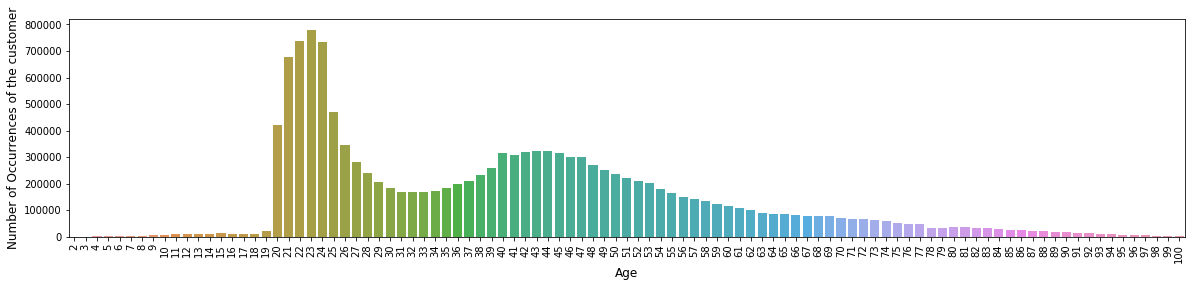

In [44]:
train['Age'] = train['Age'].astype('float64')

age_series = train.Age.value_counts()
plt.figure(figsize=(20,4))
sns.barplot(age_series.index.astype('int'), age_series.values)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Let's have a look at the box plot of age Vs Segment

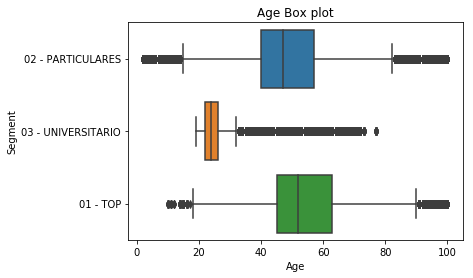

In [45]:
sns.boxplot(train["Age"].values, train["Segment"])
plt.xlabel("Age")
plt.title("Age Box plot")
plt.show()

Our hypothesis about university students seems to be true. The customers in university segemnt seems to have median age of 24 years while other to 2 segments have median age of 46 and 52

Let's have a look at the distribution of age vs all the products

In [46]:
for col in train[eng_target_features]:
    sns.boxplot(train.loc[train[col]==1], train.loc[train[col] == 1, "Age"].values)
    plt.xlabel(col)
    plt.ylabel("Age")
    plt.title("Age Box plot")
    plt.show()

ValueError: could not broadcast input array from shape (1396,48) into shape (1396)

This boxplot confirms our belief about the median ages of cutsomer's having various types of accounts. We can see that customer's having junior account are very young. Since we have capped age at 18, we can see that median age for junior account holders is more than 18. In reality that might not be true

Age distribution looks far better now, without outliers and missing values!!

In [ ]:
## New Customer

In [47]:
train["New_customer"].value_counts()

0.0    12808368
1.0      811207
Name: New_customer, dtype: int64

In [48]:
train["New_customer"].isnull().sum()

27734

In [49]:
missing_new_cust = train[train["New_customer"].isnull()]

In [50]:
missing_new_cust["Relnshp_Mnths"].value_counts()

     NA    27734
Name: Relnshp_Mnths, dtype: int64

In [51]:
missing_new_cust.sort("Customer_ID").head()

AttributeError: 'DataFrame' object has no attribute 'sort'

New_customer, Relationship_months and Join_date are all corelated variables.Customer would have joined before the observation period, but we do not have any information on that.Hence,  I think, it is best to impute the join date first by finding the first month_status_date.  

In [52]:
First_month = train.groupby(["Customer_ID"])["Customer_ID", "Month_status_date"].first()

In [53]:
train = train.merge(First_month, on="Customer_ID", how = "outer")

C:\Users\Anshul.Dhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'Customer_ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [54]:
train.loc[train["Join_date"].isnull(), "Join_date"] = train["Month_status_date_y"]

In [55]:
train.drop("Month_status_date_y", axis=1).head(5)

,Month_status_date_x,Customer_ID,Employee_Index,Customer_country,Sex,Age,Join_date,New_customer,Relnshp_Mnths,Relnshp_flag,...,Mortgage,Pension,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions,Direct_debit
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-02-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-03-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-04-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Let's calculate relationship months

In [56]:
from datetime import datetime
train["Join_date"] = pd.to_datetime(train["Join_date"])
train["Month_status_date_x"] = pd.to_datetime(train["Month_status_date_x"])

In [57]:
train.loc[train["Relnshp_Mnths"]=='     NA',"Relnshp_Mnths"] = (train.loc[train["Relnshp_Mnths"]=='     NA']["Month_status_date_x"] -  train.loc[train["Relnshp_Mnths"]=='     NA']["Join_date"])/2678400000000000

In [58]:
(train["Relnshp_Mnths"]=='     NA').sum()

0

In [59]:
train["Relnshp_Mnths"] = train["Relnshp_Mnths"].astype("int")

Now let's impute New_customer flag'

In [60]:
max(sorted(train.loc[train["New_customer"].isnull(),:]["Relnshp_Mnths"]))

4

Since we have all these customers with the maximum relationship to be 4, we will impute the new_customer flag to be 1

In [61]:
train["New_customer"] = train.loc[train["New_customer"].isnull(), "New_customer"] = 1

In [62]:
train["Relnshp_flag"].value_counts()

1.0     13594782
99.0       24793
Name: Relnshp_flag, dtype: int64

In [63]:
train["Relnshp_flag"].isnull().sum()

27734

In [64]:
pd.crosstab(train["Relnshp_flag"], train["Relnshp_Mnths"])

Relnshp_Mnths,-999999,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,256
Relnshp_flag,,,,,,,,,,,,,,,,,,,,,
1.0,38,128295,131558,129522,131981,126756,138956,126565,128547,155259,...,3511,2267,1777,1511,1071,672,416,261,179,102
99.0,0,6189,1021,737,764,686,662,611,715,444,...,5,4,0,1,0,4,0,0,0,0


The newer the customer, there is a high likelihood of a customer to have reltionship_flag to be 99. However, the percentage of new customers having 99 Relationship flag is less than 0.1%, so it will be better to impoute the values by most frequent value

In [65]:
train.loc[train["Relnshp_flag"].isnull(), "Relnshp_flag"] = 1

Great.. 4 more variables have been imputed with values!!!

In [66]:
train["Employee_Index"].value_counts()

N    13610977
B        3566
F        2523
A        2492
S          17
Name: Employee_Index, dtype: int64

In [67]:
train["Employee_Index"].isnull().sum()

27734

We do not have any more information about the employee status, so it will be safe to impute the employee index to be the most frequent value

In [68]:
train.loc[train["Employee_Index"].isnull(), "Employee_Index"] = 'N'

In [69]:
train["Employee_Index"].isnull().sum()

0

In [70]:
train["Customer_country"].value_counts().head()

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
Name: Customer_country, dtype: int64

In [71]:
train["Customer_country"].isnull().sum()

27734

Lets check if we have customer's address information in the data.

In [72]:
train.loc[train["Customer_country"].isnull(), ["Address_detail", "Customer_address"]].head(10)

,Address_detail,Customer_address
4416,NaN,NaN
4417,NaN,NaN
17354,NaN,NaN
17355,NaN,NaN
17914,NaN,NaN
17915,NaN,NaN
17916,NaN,NaN
17917,NaN,NaN
19440,NaN,NaN
19441,NaN,NaN


Nope.. we do not have customer's data. So again, we can impute the customer country as the most frequent country which is Spain

In [73]:
train.loc[train["Customer_country"].isnull(), "Customer_country"] = 'ES'

In [74]:
train["Customer_country"].isnull().sum()

0

Residence flag and forigner flag

In [75]:
pd.crosstab(train["Residence_flag"], train["Forigner_flag"])

Forigner_flag,N,S
Residence_flag,,
N,13255,52609
S,12961584,592127


In [76]:
pd.crosstab(train.loc[train["Residence_flag"]=='S',"Customer_country"], train["Forigner_flag"])

Forigner_flag,N,S
Customer_country,,
CO,0,1
ES,12961583,592125
FR,0,1
US,1,0


As we have imputed missing customer_country to be Spain, it will be safe to impute the residence flag to be Y and Forigner flag to be No, as we have only 4% of the spanish customer;s to have forigner flag 

In [77]:
train.loc[train["Residence_flag"].isnull(), "Residence_flag"] = "S"
train.loc[train["Forigner_flag"].isnull(), "Forigner_flag"] = "N"

In [78]:
# Sex - Let's create a separate category for missing values in Sex

In [79]:
train["Sex"].isnull().sum()

27804

In [80]:
train["Sex"].value_counts()

V    7424252
H    6195253
Name: Sex, dtype: int64

In [81]:
train.loc[train["Sex"].isnull(), "Sex"] = 'U'
test.loc[test["Sex"].isnull(), "Sex"] = 'U'

In [82]:
train["Emp_spouse_flag"].value_counts()

N    1791
S      17
Name: Emp_spouse_flag, dtype: int64

Almost all values have missing value, so let's create a separate category for missing values

In [83]:
train.loc[train["Emp_spouse_flag"].isnull(),"Emp_spouse_flag"] = "U"
test.loc[test["Emp_spouse_flag"].isnull(),"Emp_spouse_flag"] = "U"

In [84]:
train["Channel_when_joined"].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', nan, 'KAZ', 'RED', 'KHC',
       'KHQ', 'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KHN', 'KEH', 'KAD',
       'KBG', 'KGC', 'KHF', 'KFK', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG',
       'KFG', 'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI',
       'KFU', 'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY',
       'KFF', 'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL',
       'KAY', 'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ',
       'KDA', 'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007',
       'KEU', 'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ',
       'KCN', 'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA',
       'KBH', 'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW',
       'KDZ', 'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM',
       'KEZ', 'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX',
       'KDB', 'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL',
       'KDG', '

In [85]:
print ("Total unique values: ", len(train["Channel_when_joined"].unique()))
print ("Missing values in Channel_when_joined:", train["Channel_when_joined"].isnull().sum())

Total unique values:  163
Missing values in Channel_when_joined: 186126


Lets create a separate category for below columns - 
"Customer_country", "Cust_type_beg_Mth", "Cust_Reln_type_beg_mth", "Channel_when_joined", "Deceased_flag", "Address_type", "Customer_address", "Address_detail", "Activity_flag", "Segment"

In [86]:
cols = ["Customer_country", "Cust_type_beg_Mth", "Cust_Reln_type_beg_mth", "Channel_when_joined", "Deceased_flag", "Address_type",
      "Customer_address", "Address_detail", "Activity_flag", "Segment"]
for col in cols:
    print ("Column:, \n Unique values", col, train[col].unique())

Column:, 
 Unique values Customer_country ['ES' 'CA' 'US' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR'
 'VE' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'BM' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO'
 'IL' 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM'
 'SA' 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK'
 'HU' 'TR' 'OM' 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB'
 'JP' 'MT' 'NG' 'PK' 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM'
 'KH' 'GI' 'SL' 'GN' 'GW' 'CG' 'LV' 'LT' 'ML' 'MK' 'IS' 'LY' 'CF' 'GM'
 'KZ' 'CD' 'BZ' 'ZW' 'DJ' 'JM']
Column:, 
 Unique values Cust_type_beg_Mth [1.0 '1.0' '1' nan '3.0' 3.0 '2' '3' '2.0' 2.0 '4.0' 'P' '4' 4.0]
Column:, 
 Unique values Cust_Reln_type_beg_mth ['A' 'I' nan 'P' 'R' 'N']
Column:, 
 Unique values Channel_when_joined ['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' nan 'KAZ' 'RED' 'KHC' 'KHQ' 'KHK'
 'KGN' 'KHM' 'KHO' 'KDH' 'KHN' 'KEH' 'KAD' 'KBG' 'KGC' 'KHF

In [87]:
train.loc[train["Customer_country"].isnull(),"Customer_country"] = 'UN'

In [88]:
train.loc[train["Channel_when_joined"].isnull(),"Channel_when_joined"] = 'UNK'
test.loc[test["Channel_when_joined"].isnull(),"Channel_when_joined"] = 'UNK'

In [89]:
train.loc[train["Address_detail"].isnull(),"Address_detail"] = 'UNKNOWN'

In [90]:
train.loc[train["Cust_type_beg_Mth"]=='P', "Cust_type_beg_Mth"] = 5
train.loc[train["Cust_type_beg_Mth"].isnull(), "Cust_type_beg_Mth"] = -99
train["Cust_type_beg_Mth"] =train["Cust_type_beg_Mth"].astype("float")

In [91]:
test.loc[test["Cust_type_beg_Mth"].isnull(), "Cust_type_beg_Mth"] = -99
test["Cust_type_beg_Mth"] =test["Cust_type_beg_Mth"].astype("float")

In [92]:
train["Cust_Reln_type_beg_mth"].value_counts()

I    7304875
A    6187123
P       4656
R        870
N          4
Name: Cust_Reln_type_beg_mth, dtype: int64

We do not have any catgeory in the definition named N.. Looks like its a typo.. We will consider this as a missing value

In [93]:
train.loc[train["Cust_Reln_type_beg_mth"] == 'N']

,Month_status_date_x,Customer_ID,Employee_Index,Customer_country,Sex,Age,Join_date,New_customer,Relnshp_Mnths,Relnshp_flag,...,Pension,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions,Direct_debit,Month_status_date_y
13262276,2015-10-28,1465879,N,ES,V,26.0,2015-10-02,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-28
13613004,2016-02-28,1528222,N,ES,V,5.0,2016-02-02,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-02-28
13614878,2016-02-28,1528995,N,ES,V,13.0,2016-02-04,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-02-28
13622351,2016-03-28,1536581,N,ES,V,18.0,2016-03-03,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-28


In [94]:
train.loc[train["Cust_Reln_type_beg_mth"] == 'N',"Cust_Reln_type_beg_mth"] = 'I'

In [95]:
train.loc[train["Cust_Reln_type_beg_mth"].isnull(), "Cust_Reln_type_beg_mth"] = 'U'
test.loc[test["Cust_Reln_type_beg_mth"].isnull(), "Cust_Reln_type_beg_mth"] = 'U'

In [96]:
train["Deceased_flag"].value_counts()

N    13584813
S       34762
Name: Deceased_flag, dtype: int64

In [97]:
train.loc[train["Deceased_flag"].isnull(),"Deceased_flag"] = 'N'

In [98]:
train.loc[train["Address_type"].isnull(),"Address_type"] = 0

In [99]:
train.loc[train["Customer_address"].isnull(),"Customer_address"] = -99
test.loc[test["Customer_address"].isnull(),"Customer_address"] = -99

In [100]:
train.loc[train["Address_detail"].isnull(),"Address_detail"] = 'Missing'
test.loc[test["Address_detail"].isnull(),"Address_detail"] = 'Missing'

In [101]:
train.loc[train["Activity_flag"].isnull(),"Activity_flag"] = -99

In [102]:
train.loc[train["Segment"].isnull(), "Segment"] = '04-Missing'
test.loc[test["Segment"].isnull(), "Segment"] = '04-Missing'

In order to predict the products correctly, I think knowing the household income will be very important. Lets have a look at the distribution of household income

I tried using linear regression to predict the household income using relevant variables, but the model was not performing very well... So I decided to impute the missing values with median houshold income

Text(0.5,1,'Household income distribution')

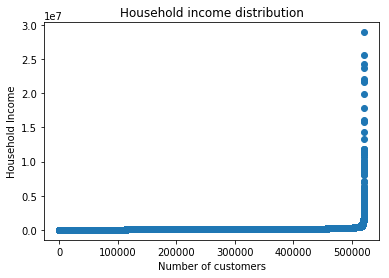

In [103]:
unique_values = np.sort(train["Gross_household_income"].unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.xlabel("Number of customers")
plt.ylabel("Household Income")
plt.title("Household income distribution")


In [104]:
train["Gross_household_income"].dropna().describe([.99,0.995,0.997,0.998,0.999,1])

count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
50%      1.018500e+05
99%      5.547950e+05
99.5%    7.455800e+05
99.7%    9.217985e+05
99.8%    1.093848e+06
99.9%    1.537817e+06
100%     2.889440e+07
max      2.889440e+07
Name: Gross_household_income, dtype: float64

In [105]:
train["Gross_household_income"].median()

101850.0

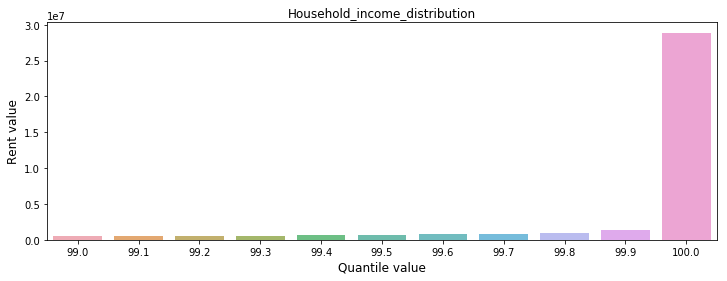

In [106]:
train["Gross_household_income"].fillna(101850., inplace=True) #filling NA as median for now
quantile_series = train["Gross_household_income"].quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.title("Household_income_distribution")
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.show()

Capping the Household income at 1354778.4


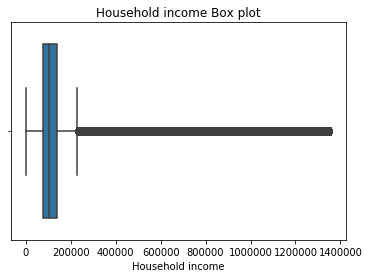

In [108]:
rent_max_cap = train["Gross_household_income"].quantile(0.999)
print ("Capping the Household income at", rent_max_cap)
train.loc[train["Gross_household_income"]>rent_max_cap,"Gross_household_income"] = rent_max_cap # assigining 99.9% value 
sns.boxplot(train["Gross_household_income"].values)
plt.xlabel("Household income")
plt.title("Household income Box plot")
plt.show()

Lets have a look at the box plot of products Vs household income

Are there any products where the spread of household income is very high
Are there any products where we see a lot of outliers 

Try and change the scale

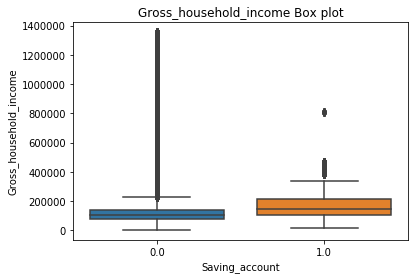

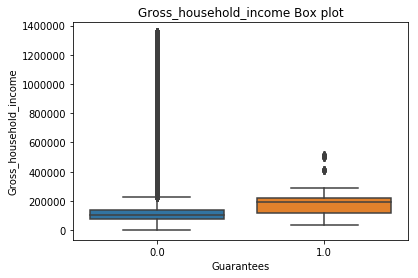

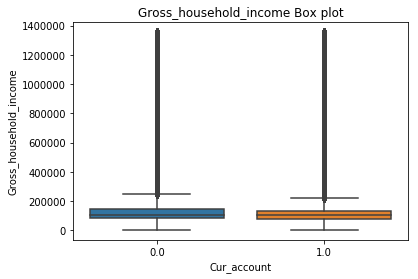

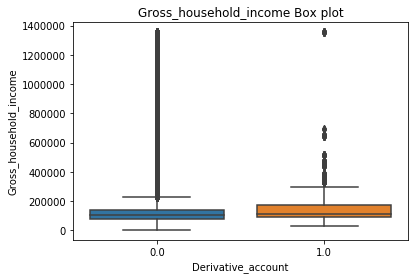

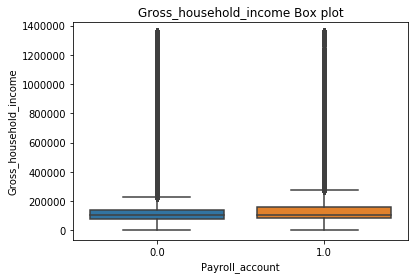

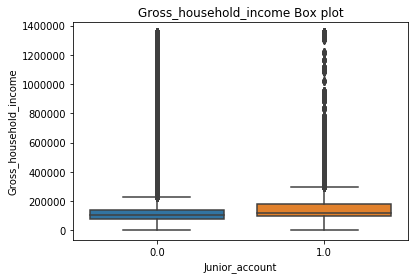

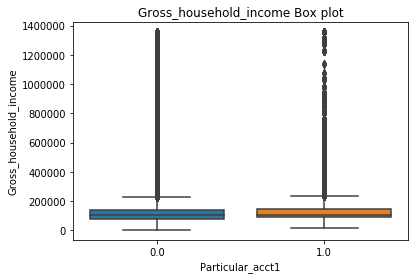

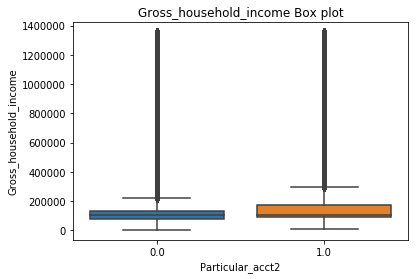

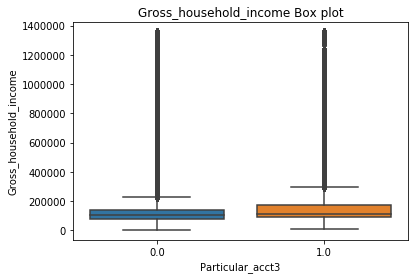

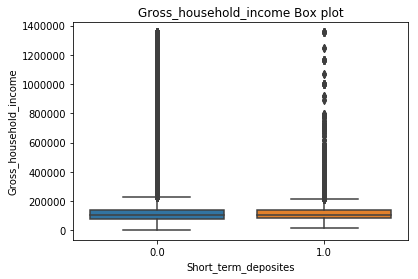

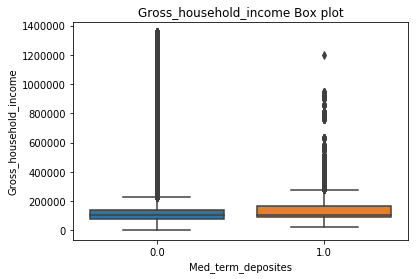

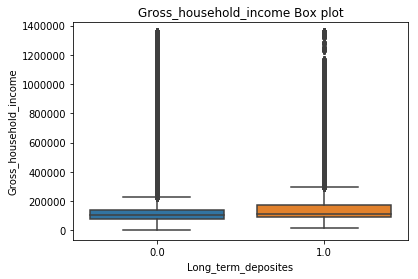

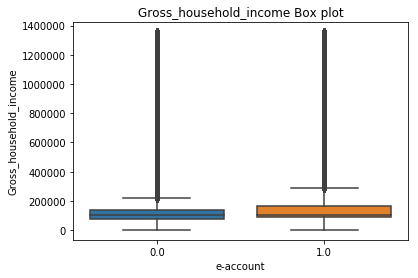

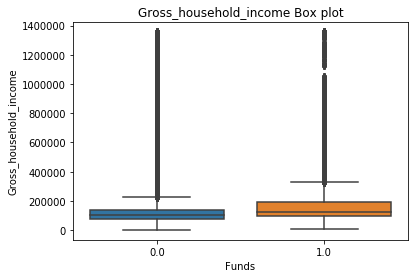

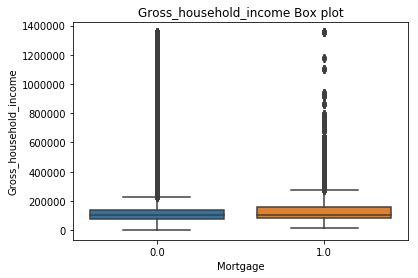

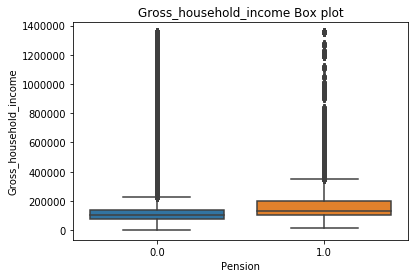

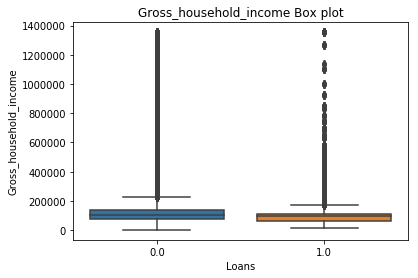

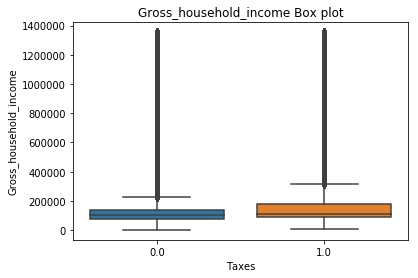

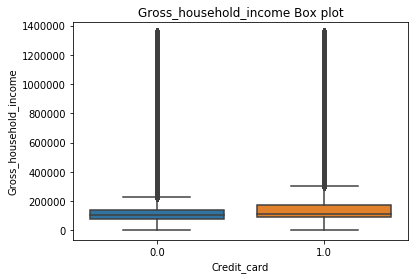

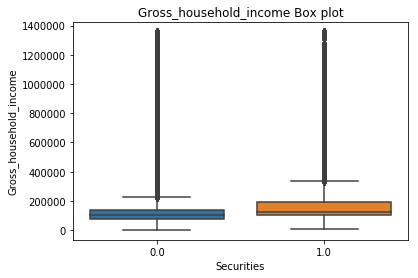

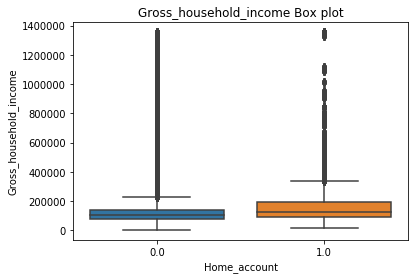

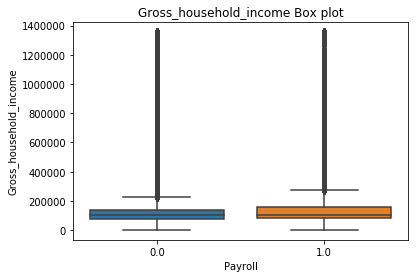

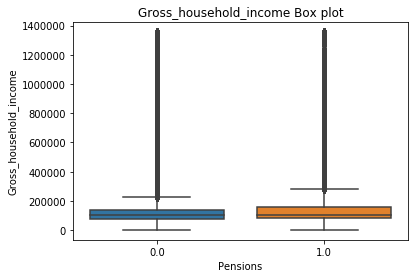

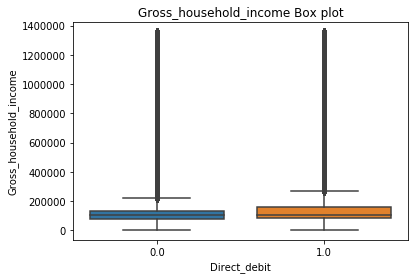

In [109]:
for col in train[eng_target_features]:
    sns.boxplot(train[col], train["Gross_household_income"].values)
    plt.xlabel(col)
    plt.ylabel("Gross_household_income")
    plt.title("Gross_household_income Box plot")
    plt.show()

Oh... That doesn't look so good... There is hardly any difference between the household income of customers whether they have the product or they dont... I was thinking of building a linear regression model to correctly predict the household income of customers where we have missing values but not sure, if it will be worth it. I will do this if I have extra time before next week's deliverable

In [133]:
test['Gross_household_income'] = test['Gross_household_income'].apply(lambda x: x.strip())

In [134]:
test["Gross_household_income"].fillna(101850., inplace=True) 


In [141]:
test["Gross_household_income"].apply(float)

ValueError: could not convert string to float: 'NA'

In [138]:
test['Gross_household_income'].head()

0    326124.90
1           NA
2           NA
3    148402.98
4    106885.80
Name: Gross_household_income, dtype: object

In [135]:
type(test["Gross_household_income"]), type(rent_max_cap)

(pandas.core.series.Series, float)

In [136]:
test['Gross_household_income'].isna().sum()

0

In [137]:
test["Gross_household_income"] = test["Gross_household_income"].astype('float')

ValueError: could not convert string to float: 'NA'

In [ ]:
test.loc[test["Gross_household_income"]>rent_max_cap,"Gross_household_income"] = rent_max_cap

ValueError: could not convert string to float: '         NA'

In [142]:
train["Payroll"].value_counts()

0.0    12885285
1.0      745961
Name: Payroll, dtype: int64

In [143]:
train["Pensions"].value_counts()

0.0    12821161
1.0      810085
Name: Pensions, dtype: int64

In [144]:
train.loc[train["Payroll"].isnull(),"Payroll"] = 0
train.loc[train["Pensions"].isnull(),"Pensions"] = 0

In [145]:
train["Last_date_Prim_Cust"].max()

TypeError: '>=' not supported between instances of 'float' and 'str'

In [146]:
train['Month_status_yearmonth'] = train['Month_status_date_x'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['Month_status_yearmonth'].value_counts()

In [147]:
yearmonth

201605    931453
201604    928274
201603    925076
201602    920904
201601    916269
201512    912021
201511    906109
201510    892251
201509    865440
201508    843201
201507    829817
201506    632110
201505    631957
201504    630367
201503    629209
201502    627394
201501    625457
Name: Month_status_yearmonth, dtype: int64

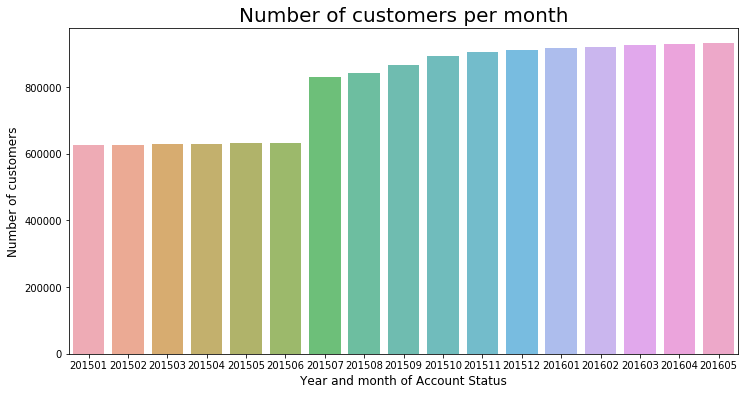

In [148]:
plt.figure(figsize=(12,6))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8)
plt.xlabel('Year and month of Account Status', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.title("Number of customers per month", fontsize=20)
plt.show()

In [149]:
print (yearmonth.index, yearmonth.values)

Int64Index([201605, 201604, 201603, 201602, 201601, 201512, 201511, 201510,
            201509, 201508, 201507, 201506, 201505, 201504, 201503, 201502,
            201501],
           dtype='int64') [931453 928274 925076 920904 916269 912021 906109 892251 865440 843201
 829817 632110 631957 630367 629209 627394 625457]


Wow.. That's interesting.. We have almost steady customer numbers until ju 2015, suddenly there has been increase in number of customers in july by almost 33%. There has been slight increase in custmomers until december 2016. then for next 5 months, again the customer nmbers are pretty steady.. Is this some kind of seasonlity. Do they have more offers for customers in second half of the year?

In [150]:
train['Join_date_yearmonth'] = train['Join_date'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['Join_date_yearmonth'].value_counts()

Try Bokeh to implement this graph - zooming capability

Earliest Joining date 199501
Latest Joining date 201605


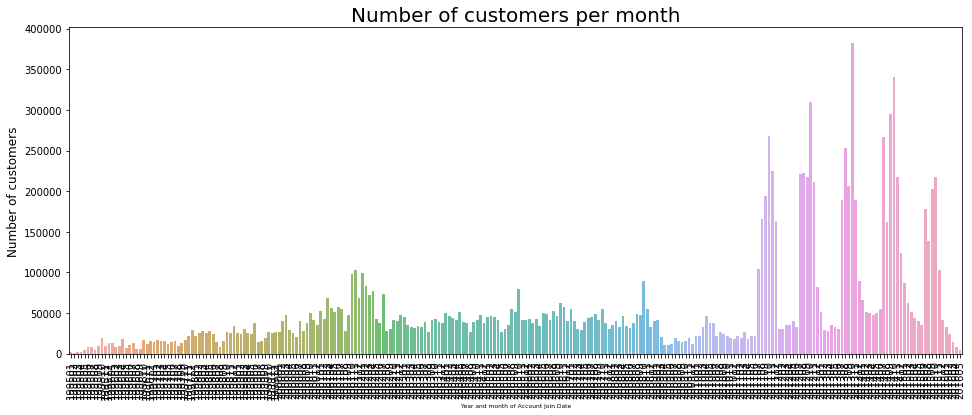

In [151]:
print ("Earliest Joining date",yearmonth.index.min())
print ("Latest Joining date",yearmonth.index.max())
plt.figure(figsize=(16,6))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8)
plt.xlabel('Year and month of Account Join Date', fontsize=6)
plt.ylabel('Number of customers', fontsize=12)
plt.title("Number of customers per month", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

Interesting again... Looks like there is some seasonlity in the number of customer's joining... Here we have customer's joining since 1995 and there are a lot of peaks and troughs in the data.. lets focus on last 3-4 years data...

In [152]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[192:]
year_month.columns = ['yearmonth', 'number_of_customers']

C:\Users\Anshul.Dhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


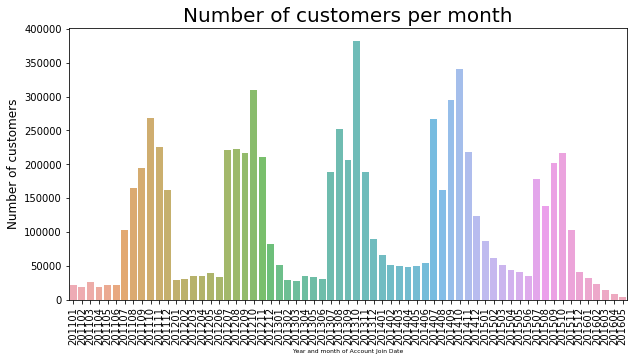

In [153]:
plt.figure(figsize=(10,5))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8)
plt.xlabel('Year and month of Account Join Date', fontsize=6)
plt.ylabel('Number of customers', fontsize=12)
plt.title("Number of customers per month", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

Cool! Every year, first 6 months the customers are pretty much the same and there is increase in number of customers until October and then again the number of customers go down sharply and then settles from Jan to Jun 

In [154]:
pd.DataFrame([train.isnull().sum().values , test.isnull().sum().values], columns=train.isnull().sum().index, index=['Train_missing', 'Test_missing']).T

,Train_missing,Test_missing
Month_status_date_x,0.0,0.0
Customer_ID,0.0,0.0
Employee_Index,0.0,0.0
Customer_country,0.0,0.0
Sex,0.0,0.0
Age,0.0,0.0
Join_date,0.0,0.0
New_customer,0.0,0.0
Relnshp_Mnths,0.0,0.0
Relnshp_flag,0.0,0.0


Now data looks pretty good.. All missing values have been treated.. outliers have been treated... 

The data looks clean now... The next steps for this week will be - 
1. We have various variables like city and address variables which I think will be quite significant in predicting which customers will buy what product. I tried segementation in order to group these categorical variables into smaller/manageable categories, however it has failed due to memory constraints. So I am going to try to segement these variables using sampling techniques and create dummy variables. 
2. We have seen a really nice pattern in the number of customers per month by join date. The customer numbers don't really change for first 6 months and it might be very important for me when predicting the customers for Jun 2016. Need to understand more about this variable and will have to see, if I can create more features to capture this seasonality in the data
3. Need to try and taste more models like Logistic regression Vs Decision tress and Random Forests and tune these models for best paramerters and get the best model out of it
4. I realised very late that I tried imputing missing values in the train data using test data but did not incorporate it in for submission for this week. I am going to impute missing values in train using test data. It's not a lot of observations, only 1K observations in 27K missing values in train. I think, adding every piece of information will be crucial in getting a better rank. 

In [155]:
train.loc[train["Month_status_date_x"] == '2016-06-28', ['Customer_ID', 'Month_status_date_x' ,'Saving_account', 'Guarantees', 'Cur_account', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']]

,Customer_ID,Month_status_date_x,Saving_account,Guarantees,Cur_account,Derivative_account,Payroll_account,Junior_account,Particular_acct1,Particular_acct2,...,Mortgage,Pension,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions,Direct_debit


In [156]:
train_may16 = train.loc[(train["Month_status_date_x"] == '2016-05-28')]
train_apr16 = train.loc[(train["Month_status_date_x"] == '2016-04-28')]

In [157]:
print (train_may16.Customer_ID.nunique())
print (train_apr16.Customer_ID.nunique())

931453
928274


In [158]:
len(set(train_may16['Customer_ID'].unique()).intersection(set(train_apr16['Customer_ID'].unique())))

926663

In [159]:
train_may16 = train_may16.ix[:,[1,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]]

C:\Users\Anshul.Dhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [160]:
train_apr16 = train_apr16.ix[:,[1,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]]

C:\Users\Anshul.Dhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [161]:
train_may_apr16 = train_may16.merge(train_apr16, on="Customer_ID", how = "inner")

In [162]:
train_may_apr16.head()

,Customer_ID,Saving_account_x,Guarantees_x,Cur_account_x,Derivative_account_x,Payroll_account_x,Junior_account_x,Particular_acct1_x,Particular_acct2_x,Particular_acct3_x,...,Mortgage_y,Pension_y,Loans_y,Taxes_y,Credit_card_y,Securities_y,Home_account_y,Payroll_y,Pensions_y,Direct_debit_y
0,1375586,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1050611,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1050612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1050613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1050614,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
train1 = train.loc[(train["Month_status_date_x"] == '2016-05-28') | (train["Month_status_date_x"] == '2016-04-28')]

In [164]:
pd.concat([train1["Customer_ID"], train1["Saving_account"], train1["Saving_account"].shift(1)], axis=1, keys=["Customer_ID","Savings_jun", "Savings_may"])

,Customer_ID,Savings_jun,Savings_may
15,1375586,0.0,NaN
16,1375586,0.0,0.0
32,1050611,0.0,0.0
33,1050611,0.0,0.0
49,1050612,0.0,0.0
50,1050612,0.0,0.0
63,1050613,0.0,0.0
64,1050613,0.0,0.0
80,1050614,0.0,0.0
81,1050614,0.0,0.0


In [165]:
y_columns = ['Cur_account', 'Saving_account', 'Guarantees', 'Cur_account', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']


In [166]:
train1.loc[train1["Customer_ID"] == 15889]

,Month_status_date_x,Customer_ID,Employee_Index,Customer_country,Sex,Age,Join_date,New_customer,Relnshp_Mnths,Relnshp_flag,...,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions,Direct_debit,Month_status_date_y,Month_status_yearmonth,Join_date_yearmonth
6988316,2016-04-28,15889,F,ES,V,56.0,1995-01-16,1,254,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2015-01-28,201604,199501
6988317,2016-05-28,15889,F,ES,V,56.0,1995-01-16,1,255,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2015-01-28,201605,199501


In [167]:
train_may16

,Customer_ID,Saving_account,Guarantees,Cur_account,Derivative_account,Payroll_account,Junior_account,Particular_acct1,Particular_acct2,Particular_acct3,...,Mortgage,Pension,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions,Direct_debit
16,1375586,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,1050611,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,1050612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,1050613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,1050614,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1050615,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,1050616,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,1050617,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,1050619,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,1050620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Only 3% of the customer's have bought a product in May 2016'

In [168]:
may_data = train.loc[train.Month_status_date_x == "2016-05-28"]
apr_data = train.loc[train.Month_status_date_x == "2016-04-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index

In [169]:
product_diff.shape

(27875, 26)

In [170]:
len(accounts_with_new_products)

27875

In [171]:
27875/float

TypeError: unsupported operand type(s) for /: 'int' and 'type'

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2016-04-28"]
apr_data = train.loc[train.Month_status_date_x == "2016-03-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index

In [ ]:
product_diff.shape

In [ ]:
len(accounts_with_new_products)/float(apr_data.shape[0])

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2016-03-28"]
apr_data = train.loc[train.Month_status_date_x == "2016-02-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2016-02-28"]
apr_data = train.loc[train.Month_status_date_x == "2016-01-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2016-01-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-12-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2015-12-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-11-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2015-11-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-10-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2015-10-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-09-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2015-09-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-08-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2015-08-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-07-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
may_data = train.loc[train.Month_status_date_x == "2015-07-28"]
apr_data = train.loc[train.Month_status_date_x == "2015-06-28"]

common_accounts = set(may_data.Customer_ID).intersection(apr_data.Customer_ID)

may_data = may_data.loc[may_data.Customer_ID.isin(common_accounts)]
apr_data = apr_data.loc[apr_data.Customer_ID.isin(common_accounts)]

may_data = may_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
apr_data = apr_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -apr_data + may_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]

accounts_with_new_products = product_diff.index
len(accounts_with_new_products)/float(may_data.shape[0])

In [ ]:
product_diff.shape

In [ ]:
product_diff["num_new_product"].value_counts()

In [ ]:
Jun15_data = train.loc[train.Month_status_date_x == "2015-06-28"]
May15_data = train.loc[train.Month_status_date_x == "2015-05-28"]

common_accounts = set(Jun15_data.Customer_ID).intersection(May15_data.Customer_ID)

Jun15_data = Jun15_data.loc[Jun15_data.Customer_ID.isin(common_accounts)]
May15_data = May15_data.loc[May15_data.Customer_ID.isin(common_accounts)]

print (Jun15_data.shape, May15_data.shape)

Jun15_data = Jun15_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
May15_data = May15_data.sort_values(by = "Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]

product_diff = -May15_data + Jun15_data
product_diff[product_diff < 0] = 0
product_diff["num_new_product"] = product_diff.sum(axis=1)
product_diff = product_diff.loc[product_diff.num_new_product >0]
product_diff.drop(["num_new_product"],inplace=True, axis=1)

accounts_with_new_products = product_diff.index
print (len(accounts_with_new_products)/float(Jun15_data.shape[0]))

In [ ]:
product_diff.head()

In [ ]:
Jun15_data = train.loc[train.Month_status_date_x == "2015-06-28"]
May15_data = train.loc[train.Month_status_date_x == "2015-05-28"]

uncommon_accounts = set(Jun15_data.Customer_ID).difference(May15_data.Customer_ID)


In [ ]:
Jun15_new = Jun15_data.loc[Jun15_data["Customer_ID"].isin(uncommon_accounts)]

In [ ]:
Jun15_new = Jun15_new.sort_values(by="Customer_ID").reset_index(drop=True).set_index("Customer_ID")[y_columns]
Jun15_new.head()

In [ ]:
final_y= pd.concat([Jun15_new, product_diff], axis=0)
final_y.head()

In [ ]:
for col in final_y.columns:
    print (col, final_y[col].sum())

In [ ]:
new_cust = set(final_y.index)

In [ ]:
Jun15_data = train.loc[train.Month_status_date_x == "2015-05-28",['Customer_ID', 'Employee_Index', 'Customer_country', 'Sex', 'Age',
                'New_customer', 'Relnshp_Mnths', 'Relnshp_flag','Last_date_Prim_Cust', 'Cust_type_beg_Mth', 'Cust_Reln_type_beg_mth',
                'Residence_flag', 'Forigner_flag', 'Emp_spouse_flag', 'Channel_when_joined', 'Deceased_flag', 
                'Address_type', 'Customer_address', 'Address_detail', 'Activity_flag', 'Gross_household_income',
                'Segment']]
Jun15_x = Jun15_data.loc[Jun15_data.Customer_ID.isin(new_cust)]
Jun15_x.shape

In [ ]:
product_diff.shape[0] + len(uncommon_accounts)


In [ ]:
print (accounts_with_new_products)

In [ ]:
y_columns = ['Cur_account', 'Saving_account', 'Guarantees', 'Derivative_account', 'Payroll_account',
                'Junior_account', 'Particular_acct1', 'Particular_acct2', 'Particular_acct3', 'Short_term_deposites',
                'Med_term_deposites', 'Long_term_deposites', 'e-account', 'Funds', 'Mortgage', 'Pension', 'Loans',
                'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions', 'Direct_debit']

In [ ]:
may16 = train.ix[train["Month_status_date_x"] == '2016-05-28', [1,0, 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]]
apr16 = train.ix[train["Month_status_date_x"] == '2016-04-28', [1,0, 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]]

In [ ]:
apr16_may16 = pd.concat([apr16, may16], axis=0)
apr16_may16 = apr16_may16.sort_values(["Customer_ID","Month_status_date_x"])

In [ ]:
apr16_may16.head(10)

Let's calculate the lag features:

In [ ]:
for col in apr16_may16[y_columns]:
    common_accounts = set(may16.Customer_ID).intersection(apr16.Customer_ID)

    may16 = may16.loc[may16.Customer_ID.isin(common_accounts)]
    may16[col] = may16[col].astype(int)
    
    col_lag = apr16_may16.groupby("Customer_ID")[col].shift(1).dropna()
    col_lag.name = col + "_lag"
    col_lag = col_lag.astype(int)
    #print col_lag.shape, may16.shape
    may16 = may16.join(col_lag, how = "outer")

In [ ]:
may16.ix[:,2:].sum(axis=0)

In [ ]:
may16_new = pd.concat([may16.ix[:,0],may16.ix[:,26:]], axis=1)

In [ ]:
may16_new.head()

In [ ]:
may16_other_feat = train.ix[train["Month_status_date_x"] == '2016-05-28', :24]

In [ ]:
may16_final = pd.merge(may16_other_feat ,may16_new, on="Customer_ID")

In [ ]:
may16_final.shape